In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('main.txt', delimiter = '\t', engine='python', quoting = 3,names=['review','status'])

In [ ]:
df.head()


,review,status
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
import re
def clean_data(review):
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    return review

In [ ]:
df['review'] = df['review'].apply(clean_data)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stop_words(review):
  review_minus_sw = []
  stop_words = nltk.corpus.stopwords.words('english')
  review = review.split()
  review = [review_minus_sw.append(word) for word in review if word not in stop_words]
  review = ' '.join(review_minus_sw)
  return review

In [ ]:
df['review'] = df['review'].apply(remove_stop_words)

In [ ]:
nltk.download('wordnet')
#WordNet is a lexical database of English.
#Using synsets, helps find conceptual relationships between words
# such as hypernyms, hyponyms, synonyms, antonyms etc.
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def lematize(review):
    review = review.split()
    lemmatizer=WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review]
    review = ' '.join(review)
    return review

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['review'] = df['review'].apply(lematize)

In [ ]:
corpus = list(df['review'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)
 # Stop words are common words in English that don't tell us anything about the polarity of a review.
    # Such words include the, that, and a
# Converts a collection of text documents to a matrix of token counts
# max_features = maximum number of words we'd like to have in our bag of words model
X = cv.fit_transform(corpus).toarray()
y = df['status'].values

In [ ]:
#cv.get_feature_names()
cv.get_feature_names_out()

array(['ability', 'able', 'absolutely', 'acting', 'action', 'actor',
       'actress', 'actually', 'addition', 'adorable', 'advise', 'age',
       'ago', 'almost', 'along', 'already', 'also', 'although', 'always',
       'amazing', 'amazon', 'ambiance', 'american', 'amount', 'angle',
       'annoying', 'another', 'anyone', 'anything', 'anytime', 'anyway',
       'appealing', 'appearance', 'appreciate', 'area', 'around',
       'arrived', 'art', 'ask', 'asked', 'aspect', 'atmosphere',
       'attempt', 'attention', 'attentive', 'audience', 'audio',
       'authentic', 'average', 'avoid', 'away', 'awesome', 'awful',
       'back', 'bacon', 'bad', 'bar', 'barely', 'bargain', 'basically',
       'bathroom', 'battery', 'bay', 'bean', 'beat', 'beautiful',
       'become', 'beef', 'beep', 'beer', 'begin', 'beginning', 'behind',
       'believable', 'believe', 'belly', 'belt', 'best', 'better',
       'beyond', 'big', 'bill', 'billy', 'bit', 'bite', 'black', 'bland',
       'blue', 'bluetooth'

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
X = tf_transformer.fit_transform(X).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(max_features =1000)
X = tfidfVectorizer.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s , y_train_s, y_test_s = train_test_split(X, y , test_size = 0.20, random_state=101)

In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# Naive Bayes is a statistical classification technique based on Bayes Theorem
# common classifier used in sentiment analysis is the Naive Bayes Classifier.
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier # this is experimental
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
classifiers = [GradientBoostingClassifier(),GaussianNB(),HistGradientBoostingClassifier(),
RandomForestClassifier(),LogisticRegression(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=0)]

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
for classifier in classifiers:
    classifier.fit(X_train_s,y_train_s)
    print(f'The {classifier}  Accuracy  is {accuracy_score(y_test_s,classifier.predict(X_test_s)) }' )

The GradientBoostingClassifier()  Accuracy  is 0.7533333333333333
The GaussianNB()  Accuracy  is 0.7216666666666667
The HistGradientBoostingClassifier()  Accuracy  is 0.68
The RandomForestClassifier()  Accuracy  is 0.77
The LogisticRegression()  Accuracy  is 0.7883333333333333
The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predic

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_s,y_train_s)
predictions = classifier.predict(X_test_s)
confusion_matrix(y_test_s, predictions)

array([[238,  59],
       [ 68, 235]])

In [ ]:
df.head()

,review,status
0,way plug u unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversation lasting minute major...,0
4,mic great,1


**CNN PART**

In [ ]:
docs = df['review']
labels = df['status']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(docs, labels , test_size = 0.20)

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

vocab_size = 5000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

model = Sequential([Embedding(vocab_size, 8, input_length=max_length),tensorflow.keras.layers.Conv1D(128, 5, activation='relu'),GlobalMaxPooling1D(),Dense(10, activation='relu'),Dense(1, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
75/75 [==============================] - 21s 143ms/step - loss: 0.6926 - acc: 0.5392 - val_loss: 0.6905 - val_acc: 0.6450
Epoch 2/20
75/75 [==============================] - 4s 56ms/step - loss: 0.6399 - acc: 0.7558 - val_loss: 0.5588 - val_acc: 0.7300
Epoch 3/20
75/75 [==============================] - 3s 36ms/step - loss: 0.3740 - acc: 0.8542 - val_loss: 0.5030 - val_acc: 0.7467
Epoch 4/20
75/75 [==============================] - 1s 18ms/step - loss: 0.2312 - acc: 0.9187 - val_loss: 0.5461 - val_acc: 0.7633
Epoch 5/20
75/75 [==============================] - 1s 13ms/step - loss: 0.1635 - acc: 0.9479 - val_loss: 0.5886 - val_acc: 0.7583
Epoch 6/20
75/75 [==============================] - 1s 10ms/step - loss: 0.1219 - acc: 0.9617 - val_loss: 0.6530 - val_acc: 0.7500
Epoch 7/20
75/75 [==============================] - 2s 20ms/step - loss: 0.0969 - acc: 0.9729 - val_loss: 0.7072 - val_acc: 0.7533
Epoch 8/20
75/75 [==============================] - 1s 19ms/step - loss: 0.0784 -

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

19/19 [==============================] - 0s 2ms/step - loss: 1.4188 - acc: 0.7283
Testing Accuracy is 72.83333539962769 


In [ ]:
X = df['review']
y = df['status']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 5000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
from keras.utils import pad_sequences

In [ ]:
max_length = 100
padding_type = "post"
trunction_type="post"
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type,truncating=trunction_type)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length,padding=padding_type, truncating=trunction_type)

In [ ]:
import numpy as np


In [ ]:

embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embeddings_index.get("paper")

array([-0.85034  ,  0.33358  , -0.65889  , -0.49871  ,  0.36585  ,
       -0.19245  ,  0.25658  , -0.053408 ,  0.31474  ,  0.2443   ,
        0.29337  , -0.44917  ,  0.15175  ,  0.39314  , -0.31786  ,
        0.060525 ,  0.81775  , -0.38847  ,  0.76761  , -1.1041   ,
       -0.1544   ,  0.31655  , -0.37238  , -0.11485  ,  0.51635  ,
       -0.39289  ,  0.16301  , -0.2532   , -0.50976  ,  0.15201  ,
        0.27808  ,  0.52522  , -0.38815  , -0.3472   , -0.61818  ,
        0.17022  ,  0.12251  , -0.24191  , -0.38877  , -0.53176  ,
       -0.46987  , -0.70502  , -0.62126  , -0.38689  , -0.85637  ,
       -0.41003  , -0.47487  , -0.21083  , -0.81338  , -0.52398  ,
        0.49894  ,  0.37909  ,  0.55428  ,  1.123    , -0.42121  ,
       -1.5674   , -0.56892  ,  0.40819  ,  1.7949   ,  0.16856  ,
       -0.0029332,  0.28786  , -0.90088  , -0.094214 ,  0.79993  ,
       -0.39096  ,  0.76286  ,  0.71307  ,  0.13194  , -0.40756  ,
       -0.18687  ,  0.89562  ,  0.46867  , -0.0028801,  0.0253

In [ ]:
import numpy as np

In [ ]:
embedding_matrix = np.zeros((len(embeddings_index) + 1, max_length))
for word, i in embeddings_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i.astype(int)] = embedding_vector.astype(int)

In [ ]:
embedding_layer = Embedding(input_dim=len(embeddings_index) + 1,output_dim=max_length,weights=[embedding_matrix],input_length=max_length,trainable=False)

In [ ]:
type(embedding_layer)

keras.layers.core.embedding.Embedding

In [ ]:
model = Sequential([
    embedding_layer,
  tensorflow.keras.layers.Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=80, validation_data=(X_test_padded, y_test))

Epoch 1/80
75/75 [==============================] - 2s 7ms/step - loss: 0.6585 - accuracy: 0.5962 - val_loss: 0.6522 - val_accuracy: 0.5700
Epoch 2/80
75/75 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.5992 - val_loss: 0.6492 - val_accuracy: 0.5883
Epoch 3/80
75/75 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.5992 - val_loss: 0.6471 - val_accuracy: 0.5967
Epoch 4/80
75/75 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.5992 - val_loss: 0.6471 - val_accuracy: 0.5817
Epoch 5/80
75/75 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.5992 - val_loss: 0.6474 - val_accuracy: 0.5817
Epoch 6/80
75/75 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.5992 - val_loss: 0.6475 - val_accuracy: 0.5817
Epoch 7/80
75/75 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.5992 - val_loss: 0.6456 - val_accuracy: 0.5817
Epoch 8/80
75/75 [==

In [ ]:
loss, accuracy = model.evaluate(X_test_padded,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

19/19 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.5817
Testing Accuracy is 58.166664838790894 


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

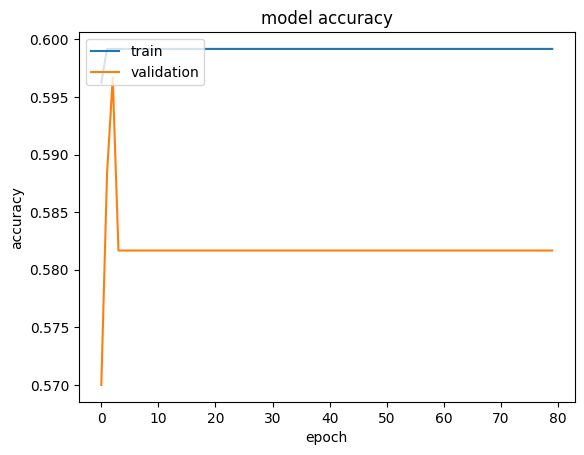

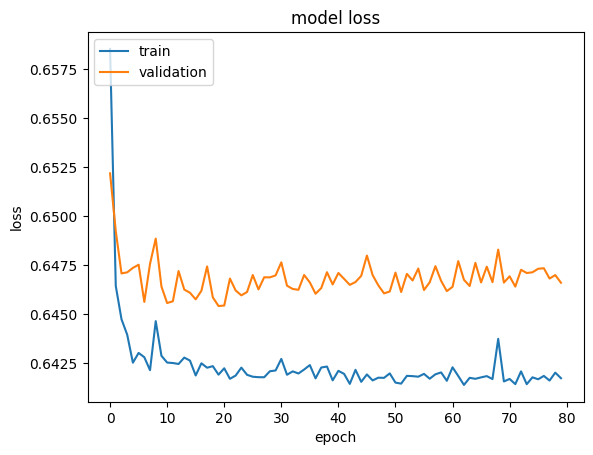

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
input_data = X_train_padded
prediction = model.predict(input_data)


75/75 [==============================] - 1s 4ms/step


In [ ]:
if prediction[100] <= 0.5:
    print('Positive Sentiment')
else:
    print('Negative Sentiment')

Positive Sentiment


In [ ]:
df['review'][100]

'integrated seamlessly motorola razr phone'